In [1]:
import pandas as pd
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt


/users/PCON0041/xiaohu/anaconda3/envs/t5chem/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df1 = pd.read_csv('/fs/ess/PCON0041/xiaohu/MAT/t5chem_results/uspto500mt/predictions_uspto.csv')
t5target = df1['target'] / 100
t5pred = df1['prediction'] / 100


ourpred = np.array(torch.load('/fs/ess/PCON0041/xiaohu/MAT/results/final/uspto_new_wsigmoid/womodels/result.pt',map_location=torch.device('cpu'))[:,0]) 
label = pd.read_csv('/fs/ess/PCON0041/xiaohu/MAT/Data/USPTO/USPTO500MT_test_processed_100.csv')['label'].values
data = pd.read_csv('/fs/ess/PCON0041/xiaohu/MAT/Data/USPTO/USPTO500MT_test_processed_100.csv') 
data_ori = pd.read_csv('/fs/ess/PCON0041/xiaohu/MAT/Data/USPTO/test.csv') 
label_unique = data['label'].unique()
temp = []
sep_data = []

for i in label_unique:
    sep_data.append(data[data["label"] == i])
    template = data_ori[data_ori['labels']==i]['retro_template'].values[0]
    #print(template)
    temp.append(template)


In [3]:
import numpy as np

t5abs_err = np.abs(t5target - t5pred) 
t5mae = np.mean(np.abs(t5target - t5pred))
print("t5 Mean Absolute Error:", t5mae)
 
ourabs_err = np.abs(t5target - ourpred) 
ourmae = np.mean(np.abs(t5target - ourpred))
print("Our Mean Absolute Error:", ourmae)

t5 Mean Absolute Error: 0.1896369333299134
Our Mean Absolute Error: 0.18059478824242167


# reaction templates

In [4]:
df1 = pd.read_csv('/fs/ess/PCON0041/xiaohu/MAT/t5chem_results/uspto500mt/predictions_uspto.csv')
t5target = df1['target'].values
t5pred = df1['prediction'].values

ourpred = np.array(torch.load('/fs/ess/PCON0041/xiaohu/MAT/results/final/uspto_new_wsigmoid/womodels/result.pt',map_location=torch.device('cpu'))[:,0]) * 100
#label = pd.read_csv('/fs/ess/PCON0041/xiaohu/MAT/Data/preprocessed_datasets/USPTO/USPTO500MT_test_processed_100.csv')['label'].values
data = pd.read_csv('/fs/ess/PCON0041/xiaohu/MAT/Data/USPTO/USPTO500MT_test_processed_100.csv')
data_ori = pd.read_csv('/fs/ess/PCON0041/xiaohu/MAT/Data/USPTO/test.csv')
label_unique = data['label'].unique()
temp = []
sep_data = []

for i in label_unique:
    sep_data.append(data[data["label"] == i])
    template = data_ori[data_ori['labels']==i]['retro_template'].values[0]
    #print(template)
    temp.append(template)


In [5]:
r = []
a = []
p = []
target_value = []
t5_value = []
our_value = []
label_value = []
judge = 'reagents'
for i in range(len(label_unique)):
    label = label_unique[i]
    temp_data = sep_data[i]
    l = sep_data[i].shape[0]
    r_unique, r_unique_count = np.unique(temp_data[judge].values, return_counts=True)
    if len(r_unique) < l:
        print('%d template, has %d reactions, %d reagents are unique'%(label, l, len(r_unique)))
        r_select = r_unique[np.where(r_unique_count>=2)[0]]
        for k in r_select:
            index1 = np.where(data['label'].values==label)[0]
            index2 = np.where(temp_data[judge].values==k)[0]

            target = t5target[index1][index2]
            t5 = t5pred[index1][index2]
            our = ourpred[index1][index2]

            print(temp_data['reactants'].values[index2], temp_data['reagents'].values[index2], temp_data['products'].values[index2],)
            for n in range(len(index2)):
                r.append(temp_data['reactants'].values[index2[n]])
                a.append(temp_data['reagents'].values[index2[n]])
                p.append(temp_data['products'].values[index2[n]])
                target_value.append(target[n])
                t5_value.append(t5[n])
                our_value.append(our[n])
                label_value.append(label)



66 template, has 50 reactions, 35 reagents are unique
['C/C(=C\\c1ccccc1)c1ccc2c(c1)C(C)(C)C(=O)C2(C)C'
 'CC(C)(C)OC(=O)N1C[C@H]2CC(=O)C[C@H]2C1'
 'CCCCC(F)(F)C(C)(O)C=CC1CCC(=O)N1CC(=O)CCCCC(=O)O' 'O=C1CC2C3CCC(C3)C2C1'
 'CC(=O)Cc1ccc(-c2ccc(Br)cc2)cc1' 'CCC(=O)C1CC=CCCCC1'
 'CC(=O)C(C)c1cc(C(F)(F)F)cc2ccoc12'] ['CCO.[BH4-].[Na+]' 'CCO.[BH4-].[Na+]' 'CCO.[BH4-].[Na+]'
 'CCO.[BH4-].[Na+]' 'CCO.[BH4-].[Na+]' 'CCO.[BH4-].[Na+]'
 'CCO.[BH4-].[Na+]'] ['C/C(=C\\c1ccccc1)c1ccc2c(c1)C(C)(C)C(O)C2(C)C'
 'CC(C)(C)OC(=O)N1C[C@H]2CC(O)C[C@H]2C1'
 'CCCCC(F)(F)C(C)(O)C=CC1CCC(=O)N1CC(O)CCCCC(=O)O' 'OC1CC2C3CCC(C3)C2C1'
 'CC(O)Cc1ccc(-c2ccc(Br)cc2)cc1' 'CCC(O)C1CC=CCCCC1'
 'CC(O)C(C)c1cc(C(F)(F)F)cc2ccoc12']
['CC(C)(CSc1ccc(Cl)cc1)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1'
 'CC(C)(C)OC(=O)NC1CCCCC(=O)C1'] ['CO.O.[BH4-].[Na+]' 'CO.O.[BH4-].[Na+]'] ['CC(C)(CSc1ccc(Cl)cc1)C(O)C(Oc1ccc(Cl)cc1)n1cncn1'
 'CC(C)(C)OC(=O)NC1CCCCC(O)C1']
['CC(C)(C)OC(=O)N1CCC(=O)C(F)CC1'
 'CC(=O)NC[C@H]1CN(c2ccc(N3CCC(=O)CC3)cc2)C(=O)O1'

In [6]:
same_reagents = pd.DataFrame({'r':r, 'a':a, 'p':p, 'target':target_value, 't5':t5_value, 'Our':our_value, 'label': label_value})

In [7]:
same_reagents.head(3)

,r,a,p,target,t5,Our,label
0,C/C(=C\c1ccccc1)c1ccc2c(c1)C(C)(C)C(=O)C2(C)C,CCO.[BH4-].[Na+],C/C(=C\c1ccccc1)c1ccc2c(c1)C(C)(C)C(O)C2(C)C,78.099998,84.943527,93.515221,66
1,CC(C)(C)OC(=O)N1C[C@H]2CC(=O)C[C@H]2C1,CCO.[BH4-].[Na+],CC(C)(C)OC(=O)N1C[C@H]2CC(O)C[C@H]2C1,93.000000,96.055290,91.586517,66
2,CCCCC(F)(F)C(C)(O)C=CC1CCC(=O)N1CC(=O)CCCCC(=O)O,CCO.[BH4-].[Na+],CCCCC(F)(F)C(C)(O)C=CC1CCC(=O)N1CC(O)CCCCC(=O)O,33.400002,48.467716,80.493011,66


In [14]:
same_reagents.to_csv('same_reagents.csv')

# Reagents same

In [9]:
import numpy as np
import pandas as pd
import torch
df1 = pd.read_csv('/fs/ess/PCON0041/xiaohu/MAT/t5chem_results/uspto500mt/predictions_uspto.csv')
t5target = df1['target'].values 
t5pred = df1['prediction'].values 
ourpred = np.array(torch.load('/fs/ess/PCON0041/xiaohu/MAT/results/final/uspto_new_wsigmoid/womodels/result.pt',map_location=torch.device('cpu'))[:,0]) 
data = pd.read_csv('same_reagents.csv')
unique_reagent = np.unique(data['a'].values)
#unique_label = np.unique(data['label'].values)
print(data.shape[0], len(unique_reagent))

t5mae = []
ourmae = []

#for l in unique_label:
    #data_i = data.loc[np.where(data['label'].values==l)[0]]
    #unique_reagent = np.unique(data_i['a'].values)
for i in unique_reagent:
        #print(i)
    index = np.where(data['a'].values==i)[0]
    target = data['target'].values[index] / 100
    t5 = data['t5'].values[index] / 100
    our = data['Our'].values[index] / 100
        #print(i, target, t5, our)
    t5mae.append(np.mean(np.abs(t5-target)))
    ourmae.append(np.mean(np.abs(our-target)))

    #if((np.mean(t5mae)<=1) & (np.mean(ourmae)<=1)):
        #print(i, t5mae, ourmae)
        #target_diff.extend(calculate_all_differences(target))
        #t5_diff.extend(calculate_all_differences(t5))
        #our_diff.extend(calculate_all_differences(our))


#plt.legend(['Our method', 't5'])

3698 619


In [10]:
t5mae = np.array(t5mae)
ourmae = np.array(ourmae)
print(np.mean(t5mae), np.mean(ourmae))
index = np.where(ourmae < t5mae)[0]
print(len(index),t5mae.shape)
print(np.mean(t5mae[index]), np.mean(ourmae[index]))
from scipy import stats
res = stats.pearsonr(t5mae, ourmae)
print(res)

0.18796289801464272 0.1761412231475797
357 (619,)
0.2218101987375724 0.14709216029721217
(0.42634653679238826, 9.899016523088894e-29)


85.0999984741211 66.33781433105469 70.41071319580078


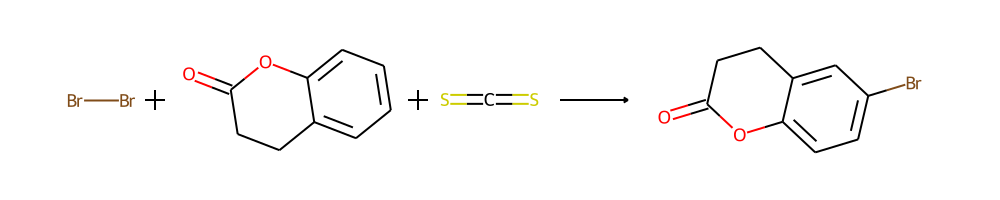

In [17]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdChemReactions as Reactions
from rdkit.Chem.Draw import IPythonConsole
from PIL import Image
data = pd.read_csv('same_reagents.csv')

index = [332,333]
smiles0 = data['r'].values[index[0]] + '.' + data['a'].values[index[0]] + '>>' + data['p'].values[index[0]]
smiles1 = data['r'].values[index[1]] + '.' + data['a'].values[index[1]] + '>>' + data['p'].values[index[1]]
#smiles2 = data['r'].values[index[2]] + '.' + data['a'].values[index[2]] + '>>' + data['p'].values[index[2]]
rxn0 = Reactions.ReactionFromSmarts(smiles0, useSmiles=True)
print(data['target'].values[index[0]], data['t5'].values[index[0]], data['Our'].values[index[0]])
Draw.ReactionToImage(rxn0)


57.09999847412109 80.5543212890625 58.41983413696289


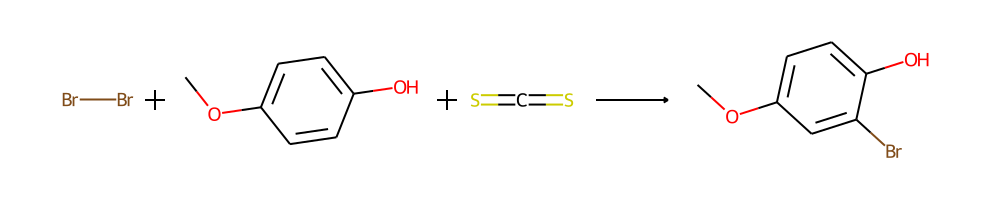

In [18]:
rxn1 = Reactions.ReactionFromSmarts(smiles1, useSmiles=True)
print(data['target'].values[index[1]], data['t5'].values[index[1]], data['Our'].values[index[1]])
Draw.ReactionToImage(rxn1)

50.20000076293945 8.169171333312988 56.68869018554688


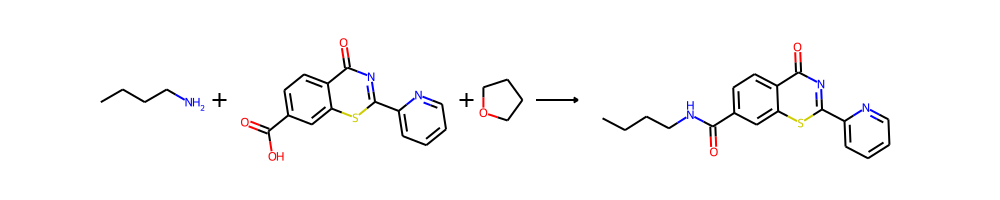

In [19]:
index = [742, 744, 88]
smiles0 = data['r'].values[index[0]] + '.' + data['a'].values[index[0]] + '>>' + data['p'].values[index[0]]
smiles1 = data['r'].values[index[1]] + '.' + data['a'].values[index[1]] + '>>' + data['p'].values[index[1]]
smiles2 = data['r'].values[index[2]] + '.' + data['a'].values[index[2]] + '>>' + data['p'].values[index[2]]
rxn0 = Reactions.ReactionFromSmarts(smiles0, useSmiles=True)
print(data['target'].values[index[0]], data['t5'].values[index[0]], data['Our'].values[index[0]])
Draw.ReactionToImage(rxn0)

38.29999923706055 72.94339752197266 65.22260284423828


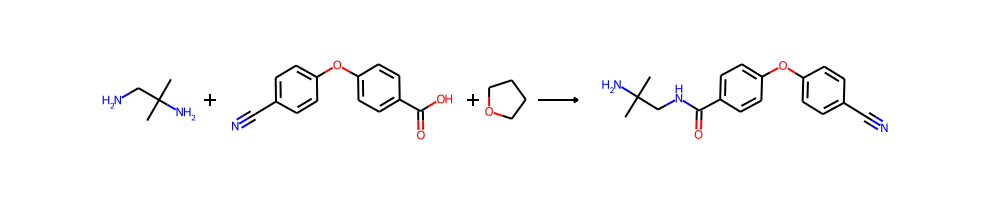

In [20]:
rxn1 = Reactions.ReactionFromSmarts(smiles1, useSmiles=True)
print(data['target'].values[index[1]], data['t5'].values[index[1]], data['Our'].values[index[1]])
Draw.ReactionToImage(rxn1)

47.59999847412109 56.59971237182617 61.92070388793945


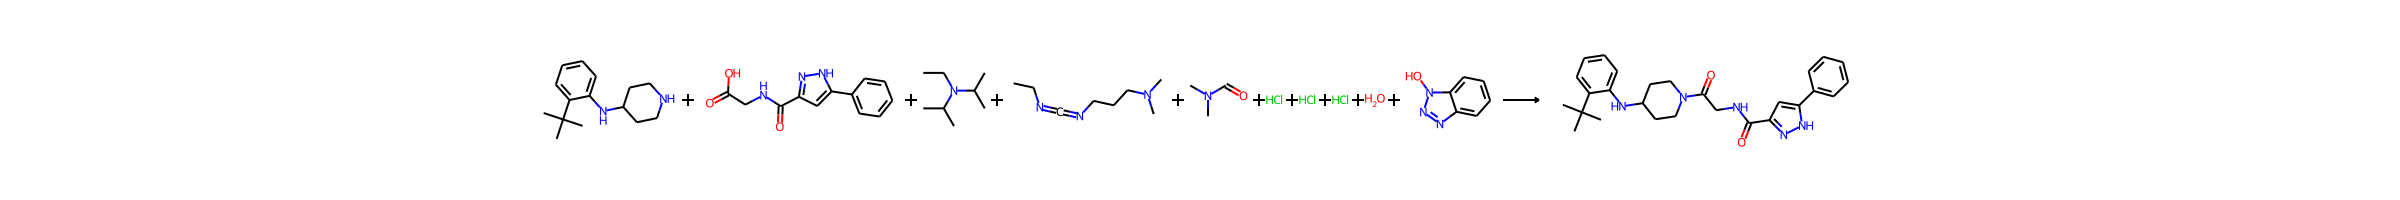

In [21]:
rxn2 = Reactions.ReactionFromSmarts(smiles2, useSmiles=True)
print(data['target'].values[index[2]], data['t5'].values[index[2]], data['Our'].values[index[2]])
Draw.ReactionToImage(rxn2)